In [41]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# 1.4 - Contour plot of f(x)

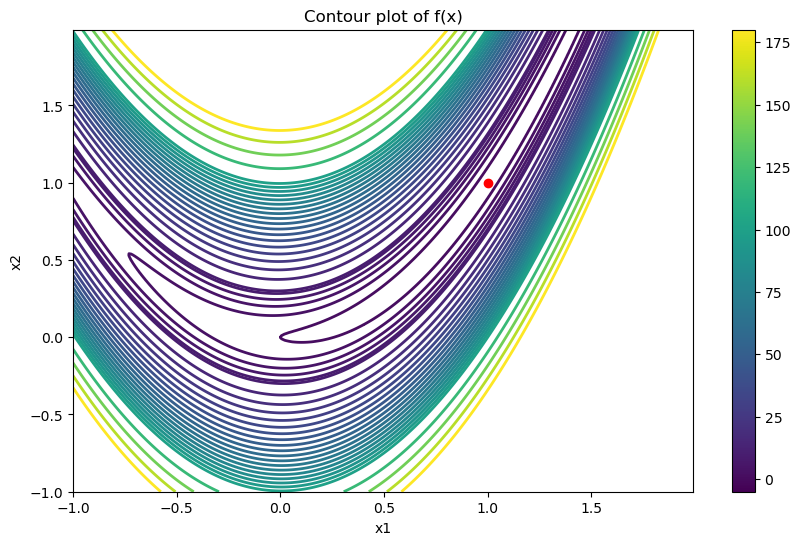

In [42]:
x1 = np.arange(-1, 2, 0.01)
x2 = x1
X, Y = np.meshgrid(x1, x2)
F = 100*(Y-X**2)**2 + 1*(1-X)**2

fig, ax = plt.subplots(figsize=(10, 6))
v = np.concatenate((np.arange(-5, 10, 2), np.arange(10, 100, 5), np.arange(100, 200, 20)), axis=None)
c = ax.contour(X, Y, F, v, linewidths=2)
norm = matplotlib.colors.Normalize(vmin=c.cvalues.min(), vmax=c.cvalues.max())
sm = matplotlib.cm.ScalarMappable(norm=norm, cmap=c.cmap)
fig.colorbar(sm, ax=ax)
ax.plot(1, 1, 'ro', markersize=6)
plt.title('Contour plot of f(x)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# 1.5 - Contour plot of log(f(x))

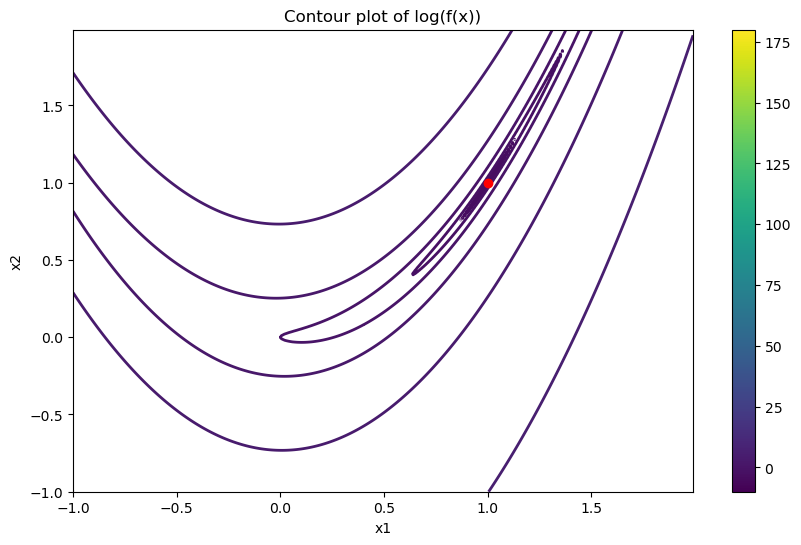

In [43]:
x1 = np.arange(-1, 2, 0.01)
x2 = x1
X, Y = np.meshgrid(x1, x2)
F = np.log(100*(Y-X**2)**2 + 1*(1-X)**2)

fig, ax = plt.subplots(figsize=(10, 6))
v = np.concatenate((np.arange(-10, 10, 2), np.arange(10, 100, 5), np.arange(100, 200, 20)), axis=None)
c = ax.contour(X, Y, F, v, linewidths=2)
norm = matplotlib.colors.Normalize(vmin=c.cvalues.min(), vmax=c.cvalues.max())
sm = matplotlib.cm.ScalarMappable(norm=norm, cmap=c.cmap)
fig.colorbar(sm, ax=ax)
ax.plot(1, 1, 'ro', markersize=6)
plt.title('Contour plot of log(f(x))')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# 1.6 - gradient and Hessian

In [44]:
def rosenbrock(x):
    f = 100*(x[1] - x[0]**2)**2 + (1-x[0])**2
    df = np.array([-400 * (-x[0]**2 + x[1])*x[0] + 2*(x[0] - 1), -200*(x[0]**2 - x[1])])
    d2f = np.array([[1200*x[0]**2 - 400*x[1] + 2, -400*x[0]], [-400*x[0], 200]])
    return f, df, d2f

# 1.7

## a - Steepest descent

In [45]:
def steepestdescent_method(alpha, fundfun, x0, maxit=2000, *args):
    # Convert x0 to a numpy array for consistency
    x = np.array(x0, ndmin=1)
    is_scalar = x.size == 1

    # Solver settings and info
    maxit = maxit #100 * (1 if is_scalar else len(x))
    tol = 1.0e-10

    # Initial iteration
    stat = {"converged": False, "nfun": 0, "iter": 0, "X": [x.copy()], "F": [], "dF": []}
    it = 0
    f, df, _ = fundfun(x, *args)
    converged = (np.linalg.norm(df, np.inf) <= tol)

    # Store data for plotting
    stat["F"].append(f)
    stat["dF"].append(df.copy())

    # Main loop of steepest descent
    while not converged and (it < maxit):
        it += 1

        p = - df / np.linalg.norm(df)
        x = x + alpha * p

        f, df, _ = fundfun(x, *args)
        converged = (np.linalg.norm(df, np.inf) <= tol)

        # Store data for plotting
        stat['X'].append(x.copy())
        stat['F'].append(f)
        stat['dF'].append(df.copy())
        stat['nfun'] += 1

    stat['iter'] = it
    # Prepare return data
    if not converged:
        stat['converged'] = converged
        return None, stat
    stat['converged'] = converged
    # Convert the solution back to a scalar if the input was a scalar
    x_result = x[0] if is_scalar else x
    return x_result, stat



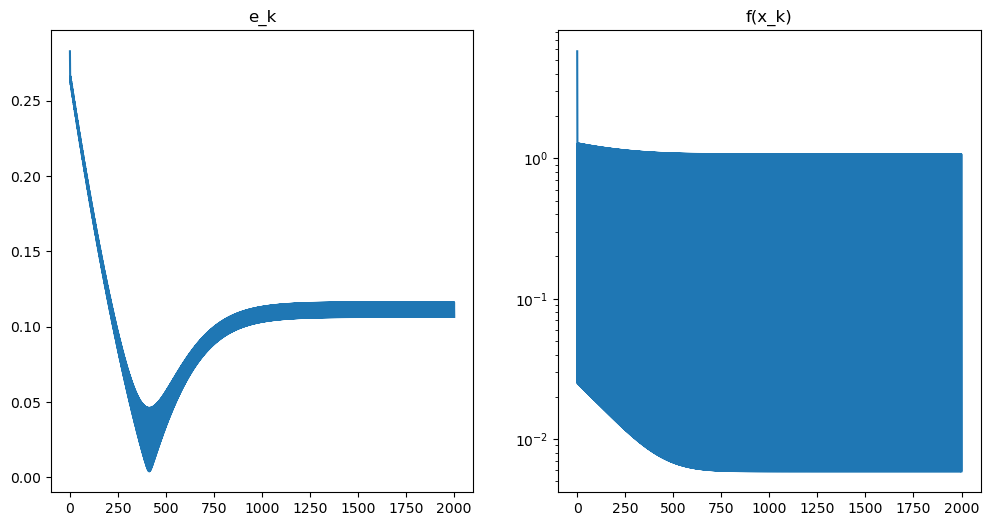

In [46]:
x0 = np.array([1.2,1.2])
alpha = 0.05
maxit = 2000
xopt, stat = steepestdescent_method(alpha, rosenbrock, x0, maxit=maxit)

err = np.sqrt((1-np.array(stat['X'])[:, 0])**2 + (1-np.array(stat['X'])[:, 1])**2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(err)
plt.title('e_k')

plt.subplot(1, 2, 2)
plt.semilogy(stat['F'])
plt.title('f(x_k)')

plt.show()

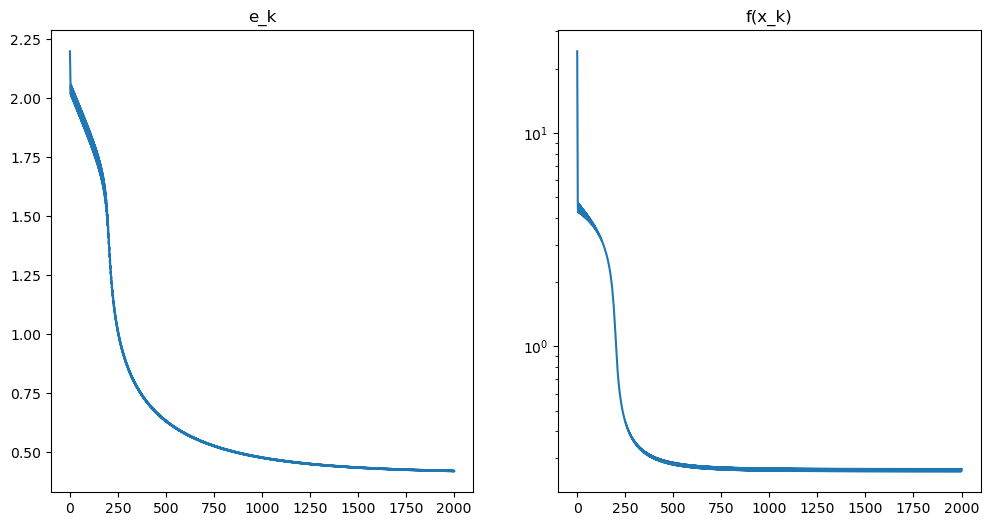

In [47]:
x0 = np.array([-1.2,1])
alpha = 0.05
maxit=2000
xopt, stat = steepestdescent_method(alpha, rosenbrock, x0, maxit=maxit)

err = np.sqrt((1-np.array(stat['X'])[:, 0])**2 + (1-np.array(stat['X'])[:, 1])**2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(err)
plt.title('e_k')

plt.subplot(1, 2, 2)
plt.semilogy(stat['F'])
plt.title('f(x_k)')

plt.show()

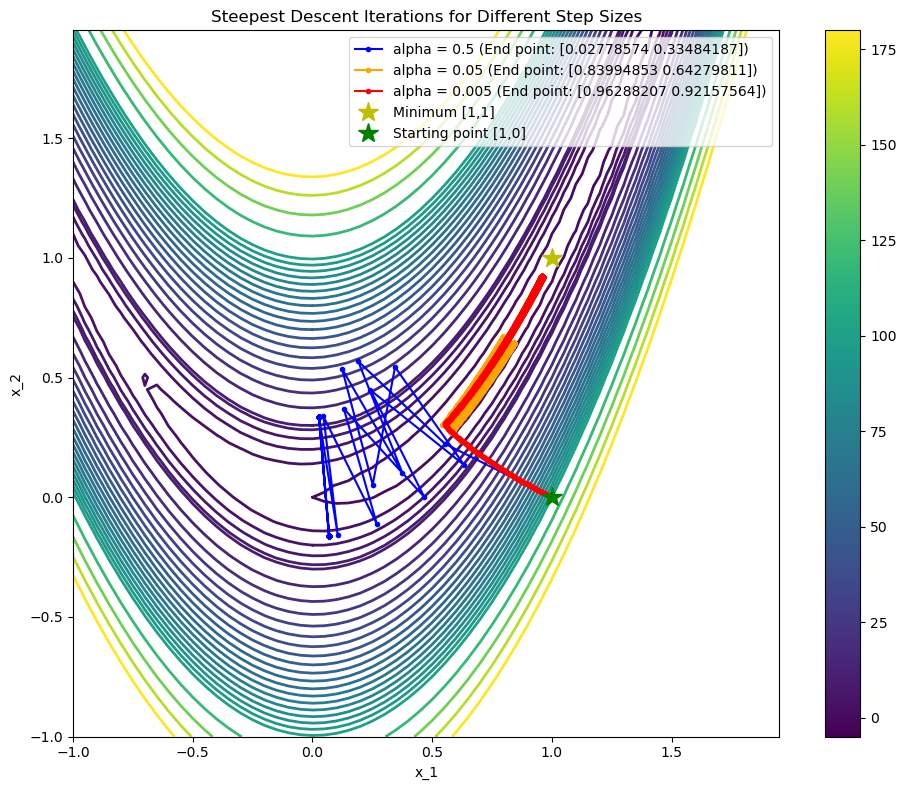

Alpha: 0.5, Starting point: [1 0], Number of iterations: 2000, End point: [0.96288207 0.92157564], Is converged: False
Alpha: 0.05, Starting point: [1 0], Number of iterations: 2000, End point: [0.96288207 0.92157564], Is converged: False
Alpha: 0.005, Starting point: [1 0], Number of iterations: 2000, End point: [0.96288207 0.92157564], Is converged: False


In [48]:
x0 = np.array([1, 0])  # Starting point
alphas = [0.5, 0.05, 0.005]  # Step sizes
colors = ['blue', 'orange', 'red']  # Different colors for each alpha
labels = [f'alpha = {alpha}' for alpha in alphas]  # Labels for legend
maxit = 2000

# Set up the contour plot grid
x1 = np.arange(-1, 2, 0.05)
x2 = x1
X, Y = np.meshgrid(x1, x2)
F = 100*(Y - X**2)**2 + (1 - X)**2

# Create a single plot figure
fig, ax = plt.subplots(figsize=(10, 8))

# Define contour levels
v = np.concatenate((np.arange(-5, 10, 2), np.arange(10, 100, 5), np.arange(100, 200, 20)), axis=None)
c = ax.contour(X, Y, F, v, linewidths=2)

norm = matplotlib.colors.Normalize(vmin=c.cvalues.min(), vmax=c.cvalues.max())
sm = plt.cm.ScalarMappable(norm=norm, cmap=c.cmap)
sm.set_array([])
fig.colorbar(sm, ax=ax)

# Loop through the different alpha values
for i, alpha in enumerate(alphas):
    # Perform steepest descent
    xopt, stat = steepestdescent_method(alpha, rosenbrock, x0, maxit=maxit)
    
    # Plot the steepest descent path for each alpha in different colors
    ax.plot(np.array(stat['X'])[:, 0], np.array(stat['X'])[:, 1], 
            color=colors[i], marker='o', markersize=3, label=f'{labels[i]} (End point: {np.array(stat["X"])[-1]})')

# Plot the starting point and minimum
ax.plot(1, 1, 'y*', markersize=15, label='Minimum [1,1]')  # True minimum
ax.plot(1, 0, 'g*', markersize=15, label='Starting point [1,0]')  # Starting point

# Set title and labels
ax.set_title('Steepest Descent Iterations for Different Step Sizes')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_aspect('equal', adjustable='box')

# Show the legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Print the results for each alpha
for i, alpha in enumerate(alphas):
    end_point = np.array(stat['X'])[-1]  # Extract the end point
    print(f"Alpha: {alpha}, Starting point: {x0}, Number of iterations: {stat['iter']}, End point: {end_point}, Is converged: {stat['converged']}")


## b - Steepest descent line

In [49]:
def steepestdescent_line_method(fundfun, x0, tol=1.0e-10, maxit=None, rho=0.5, c=0.1, *args):
    # Solver settings and info
    maxit = maxit if maxit is not None else 100*len(x0)
    
    # Initialize
    stat = {"converged": False, "nfun": 0, "iter": 0, "alpha": [], "X": [x0], "F": [], "dF": []}
    x = np.copy(x0)
    it = 0
    f, df, _ = fundfun(x, *args)
    converged = (np.linalg.norm(df, np.inf) <= tol)
    stat["nfun"] += 1
    
    # Store data for plotting
    stat["F"].append(f)
    stat["dF"].append(df)
    
    # Main loop of steepest descent
    while not converged and (it < maxit):
        it += 1
        
        p = - df / np.linalg.norm(df, 2)
        
        # backtracking line search
        alpha = 1
        fnew, _, _ = fundfun(x + alpha * p, *args)
        while fnew > (f + c * alpha * np.dot(df.T, p)):
            alpha = rho * alpha
            fnew, _, _ = fundfun(x + alpha * p, *args)
        stat["alpha"].append(alpha)
        
        x = x + alpha * p
        f, df, _ = fundfun(x, *args)
        converged = (np.linalg.norm(df, np.inf) <= tol)
        stat["nfun"] += 1
        
        # Store data for plotting
        stat["X"].append(np.copy(x))
        stat["F"].append(f)
        stat["dF"].append(df)
    
    # Prepare return data
    if not converged:
        x = [] 
    stat["converged"] = converged
    stat["iter"] = it
    
    return x, stat


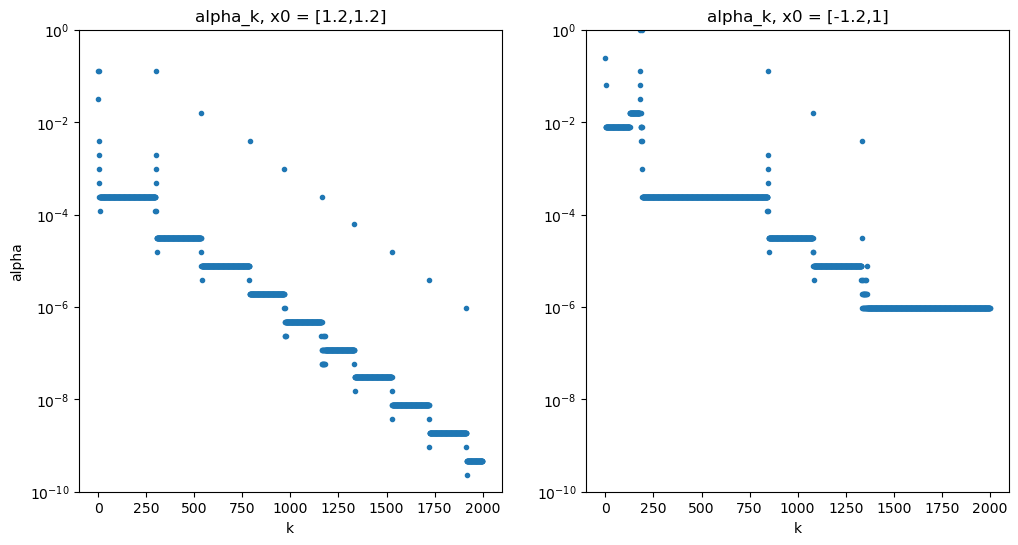

In [50]:
x0 = np.array([1.2,1.2])
xopt, stat = steepestdescent_line_method(rosenbrock, x0, tol=1.0e-10, maxit=2000)
alpha1 = stat['alpha']

x0 = np.array([-1.2,1])
xopt, stat = steepestdescent_line_method(rosenbrock, x0, tol=1.0e-10, maxit=2000)
alpha2 = stat['alpha']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.semilogy(alpha1, '.')
plt.title('alpha_k, x0 = [1.2,1.2]')
plt.xlabel('k')
plt.ylabel('alpha')
plt.ylim([1e-10,1])

plt.subplot(1, 2, 2)
plt.semilogy(alpha2, '.')
plt.title('alpha_k, x0 = [-1.2,1]')
plt.xlabel('k')
plt.ylim([1e-10,1])

plt.show()

## c - Newtons method

In [51]:

def newton_md(alpha, fundfun, x0, *varargin):
    import numpy as np

    # Solver settings and info
    maxit = 2000 #100 * len(x0)
    tol = 1.0e-10

    # Initial iteration
    x = x0
    it = 0
    f, df, d2f = fundfun(x, *varargin)
    converged = (np.linalg.norm(df, np.inf) <= tol)

    # Store data for plotting
    stat = {'X': [x], 'F': [f], 'dF': [df], 'converged': converged, 'nfun': 1, 'iter': it}

    # Main loop of Newton's method
    while not converged and (it < maxit):
        it += 1

        p = - np.linalg.solve(d2f, df)
        x = x + alpha * p

        f, df, d2f = fundfun(x, *varargin)
        converged = (np.linalg.norm(df, np.inf) <= tol)
        stat['nfun'] += 1

        # Store data for plotting
        stat['X'].append(x)
        stat['F'].append(f)
        stat['dF'].append(df)

    # Prepare return data
    if not converged:
        x = None
    stat['converged'] = converged
    stat['iter'] = it

    return x, stat

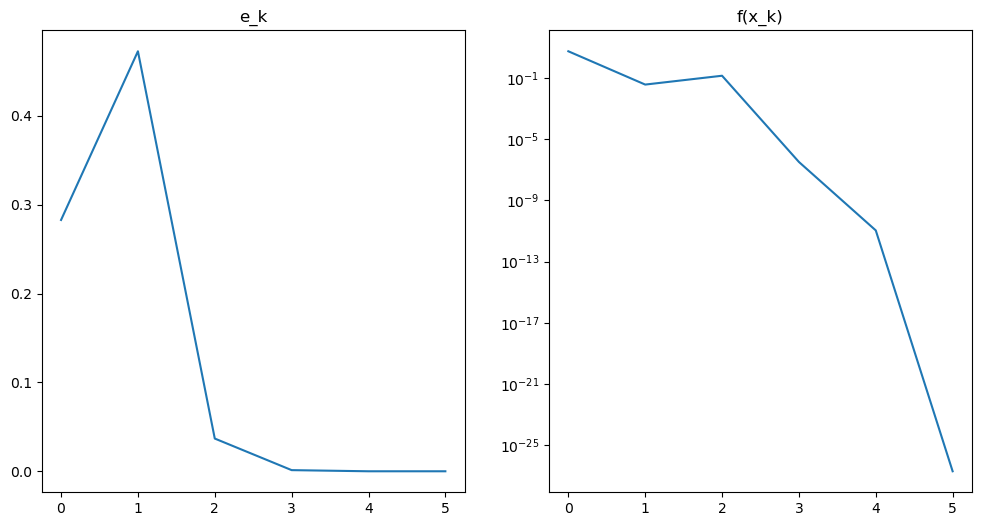

In [52]:
x0 = np.array([1.2, 1.2])
alpha = 1
xopt, stat = newton_md(alpha, rosenbrock, x0)

err = np.sqrt((1-np.array(stat['X'])[:, 0])**2 + (1-np.array(stat['X'])[:, 1])**2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(err)
plt.title('e_k')

plt.subplot(1, 2, 2)
plt.semilogy(stat['F'])
plt.title('f(x_k)')

plt.show()

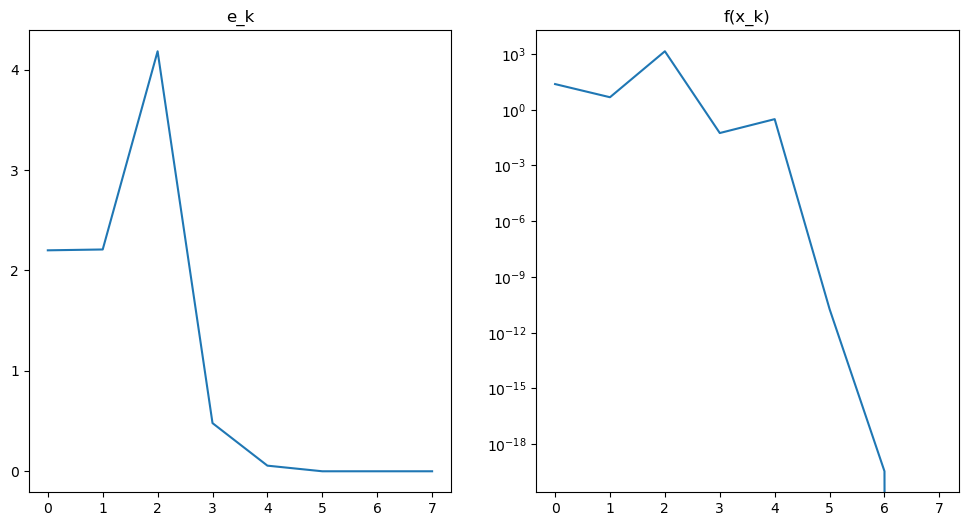

In [53]:
x0 = np.array([-1.2, 1])
alpha = 1
xopt, stat = newton_md(alpha, rosenbrock, x0)

err = np.sqrt((1-np.array(stat['X'])[:, 0])**2 + (1-np.array(stat['X'])[:, 1])**2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(err)
plt.title('e_k')

plt.subplot(1, 2, 2)
plt.semilogy(stat['F'])
plt.title('f(x_k)')

plt.show()

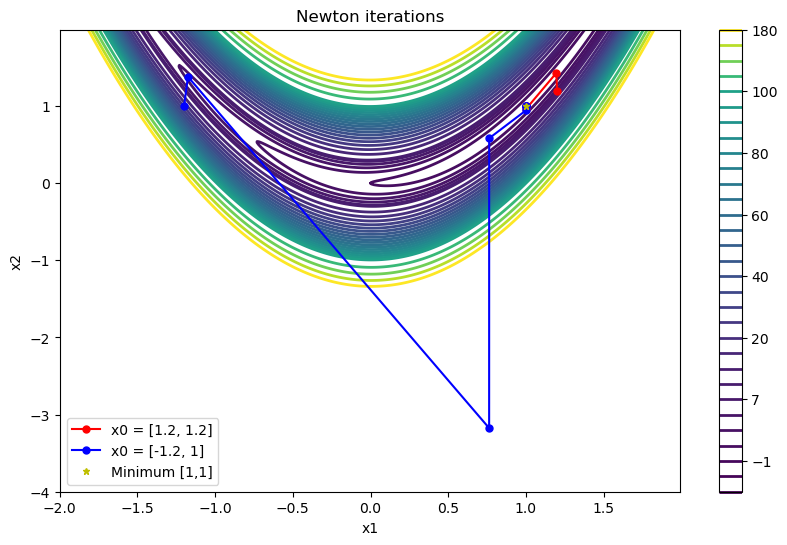

Starting point: [1.2 1.2], Number of iterations: 5
Starting point: [-1.2  1. ], Number of iterations: 7


In [54]:
def plot_rosenbrock_contour():
    x1 = np.arange(-2, 2, 0.01)
    x2 = np.arange(-4, 2, 0.01)
    X, Y = np.meshgrid(x1, x2)
    Z = 100*(Y - X**2)**2 + (1 - X)**2

    fig, ax = plt.subplots(figsize=(10, 6))
    v = np.concatenate((np.arange(-5, 10, 2), np.arange(10, 100, 5), np.arange(100, 200, 20)), axis=None)
    c = ax.contour(X, Y, Z, v, linewidths=2)
    fig.colorbar(c, ax=ax)

    ax.set_title("Newton iterations")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    
    return fig, ax

def plot_iterates(stat, ax, label, color):
    X = np.array(stat['X'])
    ax.plot(X[:, 0], X[:, 1], color=color, marker='o', markersize=5, label=label)

x0_1 = np.array([1.2, 1.2])
alpha = 1
xopt_1, stat_1 = newton_md(alpha, rosenbrock, x0_1)

x0_2 = np.array([-1.2, 1])
alpha = 1
xopt_2, stat_2 = newton_md(alpha, rosenbrock, x0_2)

fig, ax = plot_rosenbrock_contour()
plot_iterates(stat_1, ax, label="x0 = [1.2, 1.2]", color='red')
plot_iterates(stat_2, ax, label="x0 = [-1.2, 1]", color='blue')

ax.plot(1, 1, 'y*', markersize=5, label='Minimum [1,1]')
plt.legend()
plt.show()

print(f"Starting point: {x0_1}, Number of iterations: {stat_1['iter']}")
print(f"Starting point: {x0_2}, Number of iterations: {stat_2['iter']}")



## d - BFGS

In [55]:
def BFGSmethod_line(H, maxit, fundfun, x0, *args):

    # Solver settings and info
    tol = 1.0e-10
    rho = 0.5
    c = 0.1

    # Initial iteration
    x = x0
    it = 0
    f, df, _ = fundfun(x, *args)
    converged = (np.linalg.norm(df, np.inf) <= tol)
    nfun = 1

    # Store data for plotting
    X = [x]
    F = [f]
    dF = [df]
    alpha_vals = []

    I = np.eye(len(x))

    # Main loop of BFGS
    while not converged and (it < maxit):
        it += 1

        p = -np.dot(H, df)

        # backtracking line search
        alpha = 1
        fnew = fundfun(x + alpha*p, *args)[0]
        while fnew > (f + c*alpha*np.dot(df.T, p)):
            alpha *= rho
            fnew = fundfun(x + alpha*p, *args)[0]
        alpha_vals.append(alpha)

        xnew = x + alpha*p
        fnew, dfnew, _ = fundfun(xnew, *args)

        s = xnew - x
        y = dfnew - df
        rhok = 1 / np.dot(y.T, s)
        H = np.dot((I - rhok*np.outer(s, y)), np.dot(H, (I - rhok*np.outer(y, s)))) + rhok*np.outer(s, s)

        x = xnew
        f = fnew
        df = dfnew

        converged = (np.linalg.norm(df, np.inf) <= tol)
        nfun += 1

        # Store data for plotting
        X.append(x)
        F.append(f)
        dF.append(df)

    # Prepare return data
    if not converged:
        x = None 

    # Prepare return status
    stat = {
        'converged': converged,
        'iter': it,
        'nfun': nfun,
        'X': np.array(X),
        'F': np.array(F),
        'dF': np.array(dF),
        'alpha': np.array(alpha_vals)
    }

    return x, stat


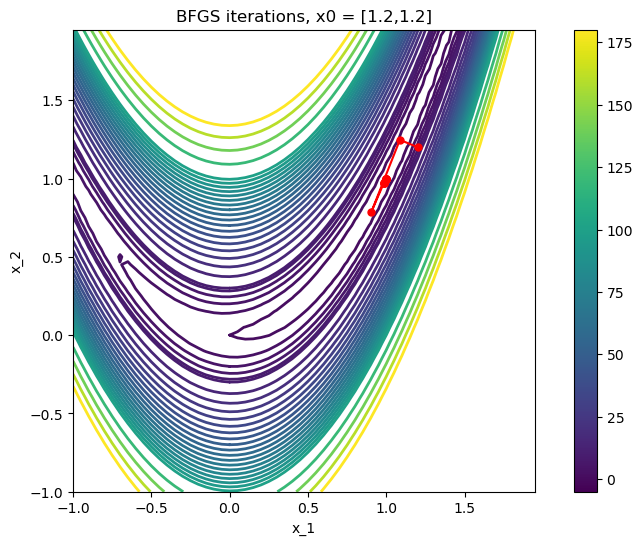

Starting point: [1.2 1.2], Number of iterations: 14


In [56]:
x0 = np.array([1.2,1.2])
H = np.eye(len(x0))
maxit = 2000
xopt, stat = BFGSmethod_line(H, maxit, rosenbrock, x0)

k = np.arange(stat['iter']+1)
# err = np.abs(np.array(stat['X'])-1)

table = list(zip(k, stat['X'], stat['F']))
df1 = pd.DataFrame(table, columns=['iter', 'x_k', 'f(x_k)'])

# Plot contour
x1 = np.arange(-1, 2, 0.05)
x2 = x1
X, Y = np.meshgrid(x1, x2)
F = 100*(Y - X**2)**2 + (1 - X)**2

fig, ax = plt.subplots(figsize=(10, 6))
v = np.concatenate((np.arange(-5, 10, 2), np.arange(10, 100, 5), np.arange(100, 200, 20)), axis=None)
c = ax.contour(X, Y, F, v, linewidths=2)
norm = matplotlib.colors.Normalize(vmin=c.cvalues.min(), vmax=c.cvalues.max())
sm = plt.cm.ScalarMappable(norm=norm, cmap = c.cmap)
sm.set_array([])
# fig.colorbar(sm, ticks=c.levels)
fig.colorbar(sm, ax=ax)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.gca().set_aspect('equal', adjustable='box')

# Plot iterations
plt.plot(np.array(stat['X'])[:, 0], np.array(stat['X'])[:, 1], color='red', marker='o', markersize=5)
plt.title('BFGS iterations, x0 = [1.2,1.2]')
plt.show()

print(f"Starting point: {x0}, Number of iterations: {stat['iter']}")

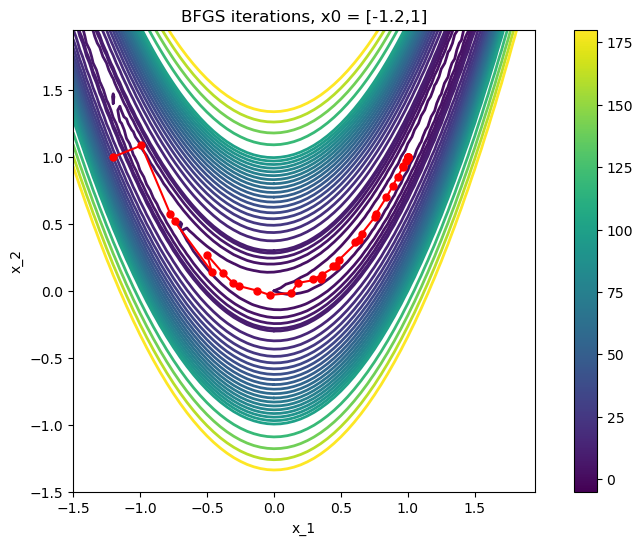

Starting point: [-1.2  1. ], Number of iterations: 35


In [57]:
x0 = np.array([-1.2,1])
H = np.eye(len(x0))
maxit = 2000
xopt, stat = BFGSmethod_line(H, maxit, rosenbrock, x0)

k = np.arange(stat['iter']+1)
# err = np.abs(np.array(stat['X'])-1)

table = list(zip(k, stat['X'], stat['F']))
df2 = pd.DataFrame(table, columns=['iter', 'x_k', 'f(x_k)'])

# Plot contour
x1 = np.arange(-1.5, 2, 0.05)
x2 = x1
X, Y = np.meshgrid(x1, x2)
F = 100*(Y - X**2)**2 + (1 - X)**2

fig, ax = plt.subplots(figsize=(10, 6))
v = np.concatenate((np.arange(-5, 10, 2), np.arange(10, 100, 5), np.arange(100, 200, 20)), axis=None)
c = ax.contour(X, Y, F, v, linewidths=2)
norm = matplotlib.colors.Normalize(vmin=c.cvalues.min(), vmax=c.cvalues.max())
sm = plt.cm.ScalarMappable(norm=norm, cmap = c.cmap)
sm.set_array([])
# fig.colorbar(sm, ticks=c.levels)
fig.colorbar(sm, ax=ax)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.gca().set_aspect('equal', adjustable='box')

# Plot iterations
plt.plot(np.array(stat['X'])[:, 0], np.array(stat['X'])[:, 1], color='red', marker='o', markersize=5)
plt.title('BFGS iterations, x0 = [-1.2,1]')
plt.show()

print(f"Starting point: {x0}, Number of iterations: {stat['iter']}")

In [58]:
x0 = np.array([1.2,1.2])
H = np.eye(len(x0))
maxit = 2000
xopt_BFGS1, stat_BFGS1 = BFGSmethod_line(H, maxit, rosenbrock, x0)

x0 = np.array([-1.2,1])
xopt_BFGS2, stat_BFGS2 = BFGSmethod_line(H, maxit, rosenbrock, x0)


err_BFGS1 = np.sqrt((1-np.array(stat_BFGS1['X'])[:, 0])**2 + (1-np.array(stat_BFGS1['X'])[:, 1])**2)
err_BFGS2 = np.sqrt((1-np.array(stat_BFGS2['X'])[:, 0])**2 + (1-np.array(stat_BFGS2['X'])[:, 1])**2)

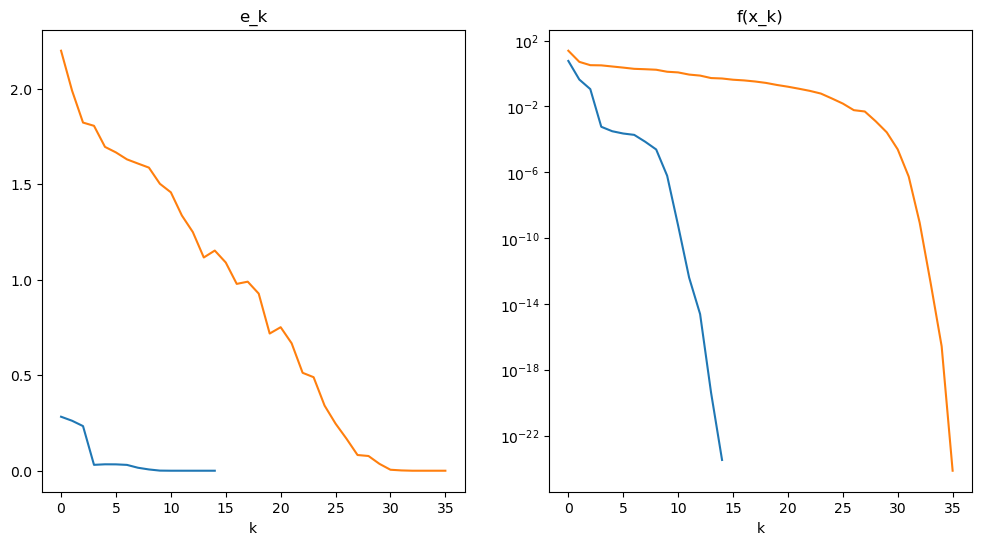

In [59]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(err_BFGS1)
plt.plot(err_BFGS2)
plt.title('e_k')
plt.xlabel('k')

plt.subplot(1, 2, 2)
plt.semilogy(stat_BFGS1['F'])
plt.semilogy(stat_BFGS2['F'])
plt.title('f(x_k)')
plt.xlabel('k')

plt.show()

# e - Final plots

In [60]:
x0 = np.array([1.2,1.2])
alpha_newton = 1
maxit = 2000
H = np.eye(len(x0))

xopt1, stat1 = steepestdescent_line_method(rosenbrock, x0, tol=1.0e-10, maxit=maxit)
xopt2, stat2 = newton_md(alpha_newton, rosenbrock, x0)
xopt3, stat3 = BFGSmethod_line(H, maxit, rosenbrock, x0)


err1 = np.sqrt((1-np.array(stat1['X'])[:, 0])**2 + (1-np.array(stat1['X'])[:, 1])**2)
err2 = np.sqrt((1-np.array(stat2['X'])[:, 0])**2 + (1-np.array(stat2['X'])[:, 1])**2)
err3 = np.sqrt((1-np.array(stat3['X'])[:, 0])**2 + (1-np.array(stat3['X'])[:, 1])**2)

it1 = stat1['iter']
it2 = stat2['iter']
it3 = stat3['iter']


conv1 = stat1['converged']
conv2 = stat2['converged']
conv3 = stat3['converged']


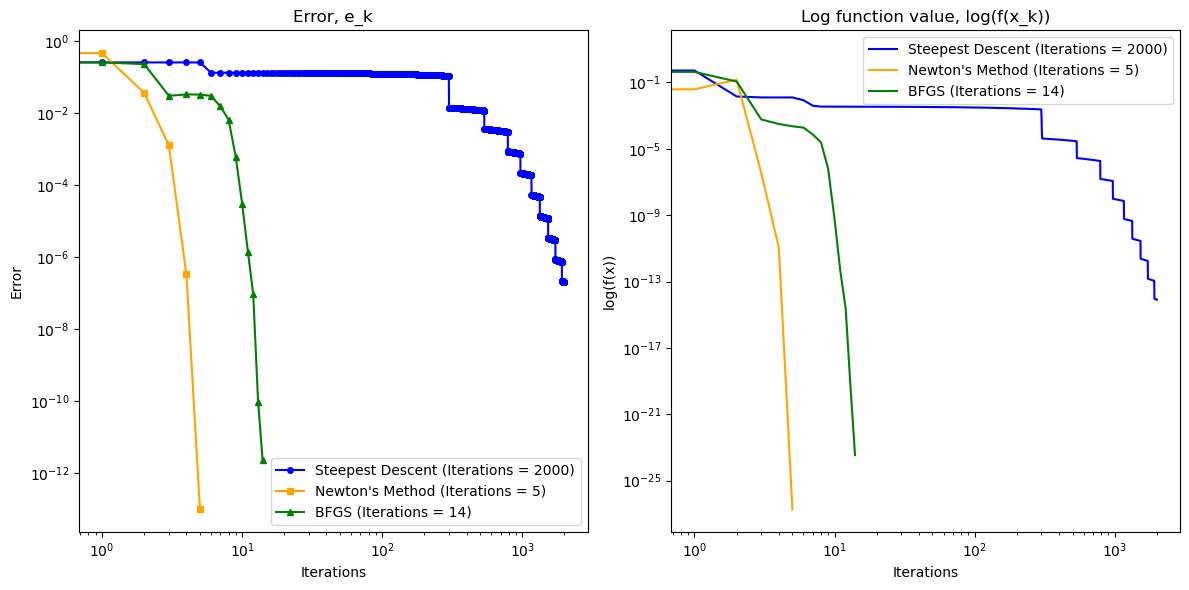

False
True
True


In [61]:
plt.figure(figsize=(12, 6))

# Subplot for errors
plt.subplot(1, 2, 1)
plt.loglog(err1, label=f'Steepest Descent (Iterations = {it1})', color='blue', linestyle='-', marker='o', markersize=4)
plt.loglog(err2, label=f'Newton\'s Method (Iterations = {it2})', color='orange', linestyle='-', marker='s', markersize=4)
plt.loglog(err3, label=f'BFGS (Iterations = {it3})', color='green', linestyle='-', marker='^', markersize=4)
plt.title('Error, e_k')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend()

# Subplot for function values
plt.subplot(1, 2, 2)
plt.loglog(stat1['F'], label=f'Steepest Descent (Iterations = {it1})', color='blue')
plt.loglog(stat2['F'], label=f'Newton\'s Method (Iterations = {it2})', color='orange')
plt.loglog(stat3['F'], label=f'BFGS (Iterations = {it3})', color='green')
plt.title('Log function value, log(f(x_k))')
plt.xlabel('Iterations')
plt.ylabel('log(f(x))')
plt.legend()

plt.tight_layout()
plt.show()

print(conv1)
print(conv2)
print(conv3)
